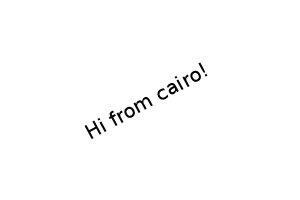

In [2]:
import cairocffi as cairo

# contextmanager and use of `with` adapted from http://preshing.com/20110920/the-python-with-statement-by-example/
# more on use of `with` at http://preshing.com/20110920/the-python-with-statement-by-example/]
# Apparently the version of pycairo that gets imported by mybinder.org doesn't support it by default. `cairocffi` does support it by default, but I was unable to get `cairocffi` to import even trying with `requiremnts.txt`. With `cairocffi` the with statement would be `with context:` as it is at http://pythonhosted.org/cairocffi/overview.html#basic-usage
from contextlib import contextmanager

@contextmanager
def saved(cr):
    cr.save()
    try:
        yield cr
    finally:
        cr.restore()

#everything below adapted from http://pythonhosted.org/cairocffi/overview.html#basic-usage
surface = cairo.ImageSurface(cairo.FORMAT_RGB24, 300, 200)
context = cairo.Context(surface)
with saved(context):
    context.set_source_rgb(1, 1, 1)  # White
    context.paint()
# Restore the default source which is black.
context.move_to(90, 140)
context.rotate(-0.5)
context.set_font_size(20)
context.show_text(u'Hi from cairo!')
surface.write_to_png('hello_example.png')

# fractal tree example above from http://preshing.com/20110920/the-python-with-statement-by-example/

# Use IPython.display Image function to show the resulting image
from IPython.display import Image
Image('hello_example.png')